In [2]:
words = open('names.txt').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # counting occurrences of each bigram
sorted(b.items(), key=lambda kv: -kv[1]) # sorting bigrams by frequency, not by key

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch
N = torch.zeros((27, 27),dtype=torch.int32) #by default float32
chars = sorted(list(set(''.join(words)))) # to get unique characters
stoi = {s:i+1 for i,s in enumerate(chars)} # char to index mapping
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()} # index to char mapping

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 # counting occurrences of each bigram



{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

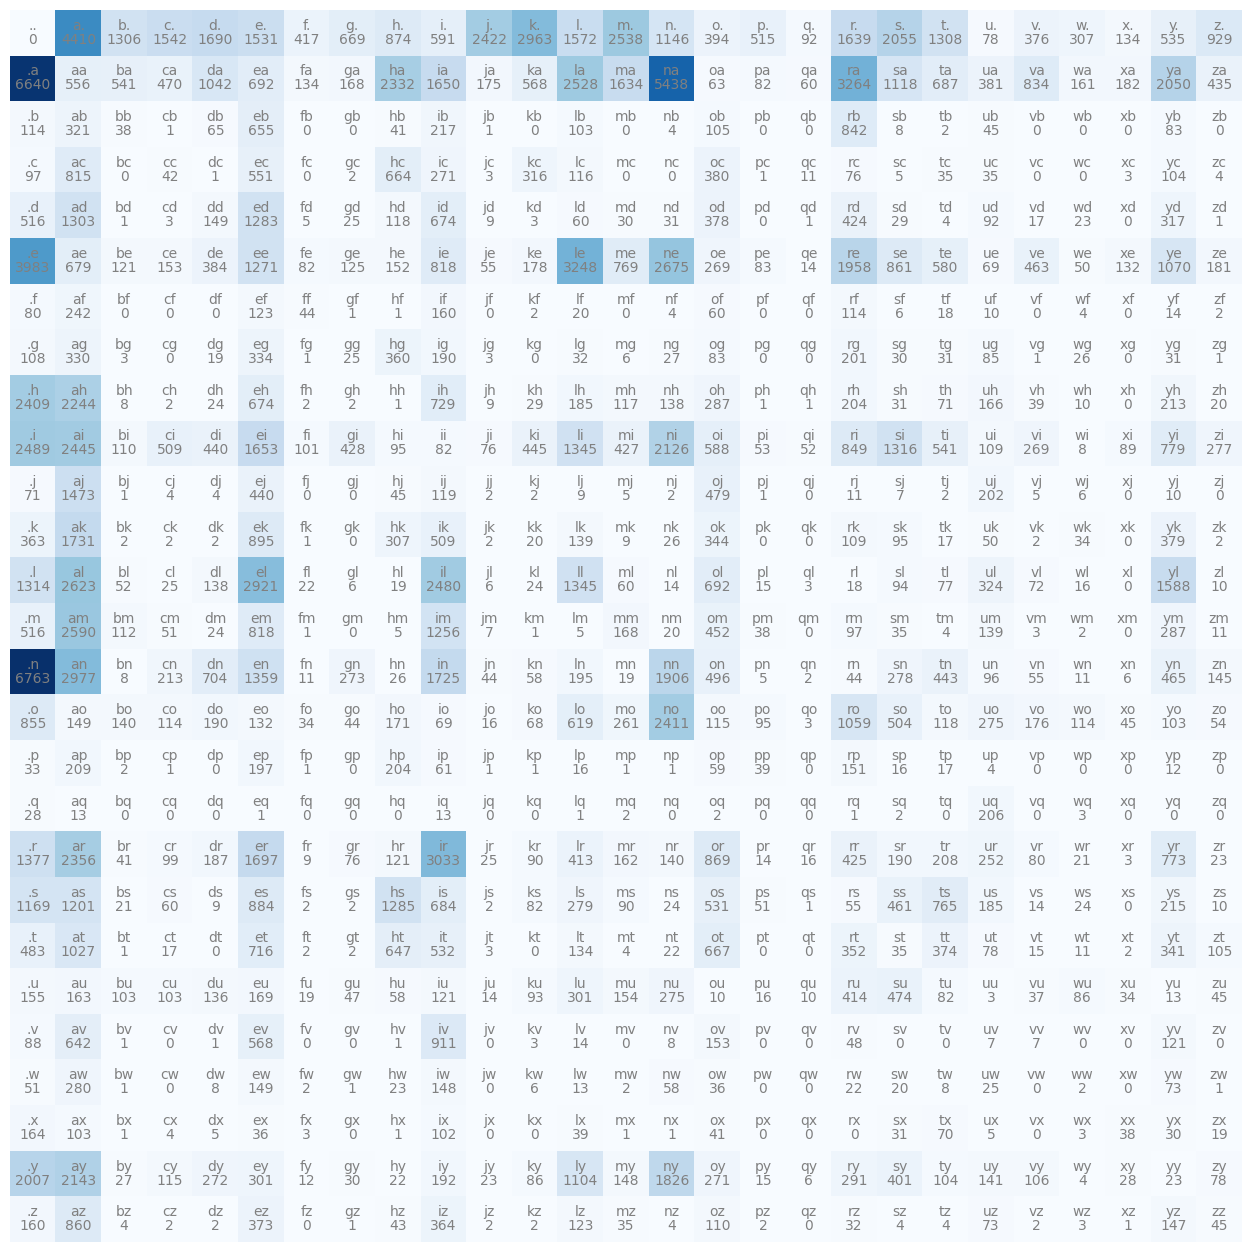

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [ ]:
p=N[0].float() #frequencies of starting letters (first row of N )
p = p / p.sum() # normalizing to get probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [88]:
g = torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

In [84]:
g = torch.Generator().manual_seed(2147483647)
p=torch.rand(3, generator=g)
p = p / p.sum() # normalizing to get probabilities
p
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [ ]:
P=(N+1).float()  # add-one smoothing
P /= P.sum(1, keepdim=True) # normalizing rows to get probabilities
P[0].sum()

tensor(1.)

In [111]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    out=[]
    ix=0
    while True:
        p=P[ix]
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break 
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [112]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:.4f}")

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3885
a.: 0.1958
.o: 0.0123
ol: 0.0779
li: 0.1774
iv: 0.0152
vi: 0.3508
ia: 0.1380
a.: 0.1958
.a: 0.1376
av: 0.0246
va: 0.2473
a.: 0.1958


for above,if 27 characters are equally likely, then 1/27 ~= 0.04%, anything above this mean model learnt something new

In [113]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"Negative log likelihood: {log_likelihood*-1:.4f}")
print(f"Average negative log likelihood: {log_likelihood*-1/n:.4f}")

Negative log likelihood: 559951.5625
Average negative log likelihood: 2.4544


**NN STRUCTURE**

In [ ]:
#creating dataset for training
xs,ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num=xs.nelement()
print('number of examples:', num)
#basically f(xs) = ys

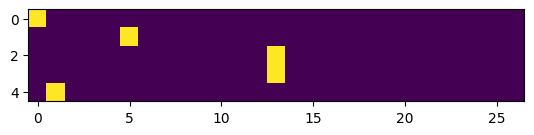

In [125]:
import torch.nn.functional as F
xenc=F.one_hot(xs, num_classes=27).float() #integer cannot be fed to NN directly
xenc.shape
plt.imshow(xenc)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27), generator=g)
xenc=F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #predict log counts
counts = logits.exp() #counts, this is  = N
probs=counts/counts.sum(1, keepdim=True)
probs.shape

torch.Size([5, 27])

In [ ]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram:
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print('__________')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned to the correct next character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


In [176]:
#creating dataset for training
xs,ys = [],[]
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # w= emma , w[1:] = mma, so em,mm,ma (combination stops when either w or w[1:] is less thaan other)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num=xs.nelement()
print('number of examples:', num)
#basically f(xs) = ys

# initializinng network
g = torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27), generator=g,requires_grad=True)

number of examples: 228146


In [178]:
for k in range(100):
    #forward pass
    xenc=F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W #predict log counts
    counts = logits.exp() #counts, this is  = N
    probs=counts/counts.sum(1, keepdim=True)
    loss=-probs[torch.arange(len(ys)), ys].log().mean()
    print(loss.item())
    #backward pass
    W.grad = None  # set gradients to zero
    loss.backward()
    # update weights
    W.data +=-50 * W.grad

3.749866008758545
3.3659565448760986
3.150946855545044
3.018293857574463
2.9262146949768066
2.85929012298584
2.808871030807495
2.7694168090820312
2.737509250640869
2.7110228538513184
2.688598155975342
2.6693384647369385
2.6526243686676025
2.6380093097686768
2.6251511573791504
2.6137804985046387
2.6036758422851562
2.5946543216705322
2.5865609645843506
2.579267740249634
2.5726656913757324
2.5666637420654297
2.561185121536255
2.556164026260376
2.551546812057495
2.547285556793213
2.5433406829833984
2.5396792888641357
2.536271810531616
2.5330941677093506
2.5301244258880615
2.52734375
2.5247364044189453
2.5222878456115723
2.5199849605560303
2.5178165435791016
2.5157713890075684
2.513841390609741
2.512017011642456
2.5102908611297607
2.5086560249328613
2.5071048736572266
2.5056328773498535
2.5042343139648438
2.502903461456299
2.501636505126953
2.5004286766052246
2.499276876449585
2.498176336288452
2.497124671936035
2.4961180686950684
2.495154857635498
2.494231700897217
2.4933459758758545
2.492

In [180]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # -----------
        # BEFORE:
        # p = P[ix]
        # -----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W  # predict log-counts
        counts = logits.exp()  # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True)  # probabilities for next character
        # -----------
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


cexze.
momasurailezityha.
konimittain.
llayn.
ka.
